In [ ]:
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
%matplotlib inline
import plotly.express as px
import plotly.io as pio

# prepare styles and colors for plots
style.use("fivethirtyeight")
colors = ["#d4ccb4", "#219ebc", "#008376", "#48314a", "#d46d6e"]
plaette = sns.color_palette(colors)
sns.palplot(sns.color_palette(colors))
plt.show()
style.use("Solarize_Light2")

# ignore warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('worldwide internet prices in 2022 - IN 2022.csv')
df

Country code                            Name  Continental region  \
0             IL                          Israel           NEAR EAST   
1             KG                      Kyrgyzstan   CIS (FORMER USSR)   
2             FJ                            Fiji             OCEANIA   
3             IT                           Italy      WESTERN EUROPE   
4             SD                           Sudan  SUB-SAHARAN AFRICA   
..           ...                             ...                 ...   
237           VA         Vatican City (Holy See)              Europe   
238           VE                       Venezuela       SOUTH AMERICA   
239           WF               Wallis and Futuna             OCEANIA   
240           CD  Congo (Democratic Republic of)  SUB-SAHARAN AFRICA   
241           ZW                        Zimbabwe  SUB-SAHARAN AFRICA   

     NO. OF Internet Plans                 Average price of 1GB (USD)  \
0                      27.0                                     $0.05   
1                      20.0                                     $0.15   
2                      18.0                                     $0.19   
3                      29.0                                     $0.27   
4                      33.0                                     $0.27   
..                      ...                                       ...   
237                     NaN                              NO PROVIDERS   
238                     NaN                            HYPERINFLATION   
239                     NaN                              NO PROVIDERS   
240                     NaN  Prices listed in non-convertible 'units'   
241                     NaN                 UNRELIABLE EXCHANGE RATES   

    Cheapest 1GB for 30 days (USD) Most expensive 1GB (USD)  \
0                            $0.02                   $20.95   
1                            $0.10                    $7.08   
2                            $0.05                    $0.85   
3                            $0.09                    $3.54   
4                            $0.03                    $0.92   
..                             ...                      ...   
237                            NaN                      NaN   
238                            NaN                      NaN   
239                            NaN                      NaN   
240                            NaN                      NaN   
241                            NaN                      NaN   

    Average price of 1GB (USD  at the start of 2021)  \
0                                              $0.11   
1                                              $0.21   
2                                              $0.59   
3                                              $0.43   
4                                              $0.63   
..                                               ...   
237                                              NaN   
238                                              NaN   
239                                              NaN   
240                                              NaN   
241                                              NaN   

    Average price of 1GB (USD – at start of 2020)  
0                                           $0.90  
1                                           $0.27  
2                                           $3.57  
3                                           $1.73  
4                                           $0.68  
..                                            ...  
237                                           NaN  
238                                           NaN  
239                                           NaN  
240                                           NaN  
241                                           NaN  

[242 rows x 9 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country code                                      241 non-null    object 
 1   Name                                              242 non-null    object 
 2   Continental region                                242 non-null    object 
 3   NO. OF Internet Plans                             230 non-null    float64
 4   Average price of 1GB (USD)                        242 non-null    object 
 5   Cheapest 1GB for 30 days (USD)                    230 non-null    object 
 6   Most expensive 1GB (USD)                          230 non-null    object 
 7   Average price of 1GB (USD  at the start of 2021)  230 non-null    object 
 8   Average price of 1GB (USD – at start of 2020)     230 non-null    object 
dtypes: float64(1), object(

In [4]:
df.dtypes

Country code                                         object
Name                                                 object
Continental region                                   object
NO. OF Internet Plans                               float64
Average price of 1GB (USD)                           object
Cheapest 1GB for 30 days (USD)                       object
Most expensive 1GB (USD)                             object
Average price of 1GB (USD  at the start of 2021)     object
Average price of 1GB (USD – at start of 2020)        object
dtype: object

In [5]:
df.describe()

NO. OF Internet Plans 
count              230.000000
mean                26.730435
std                 16.468216
min                  1.000000
25%                 15.000000
50%                 22.000000
75%                 36.000000
max                 60.000000

<Axes: >

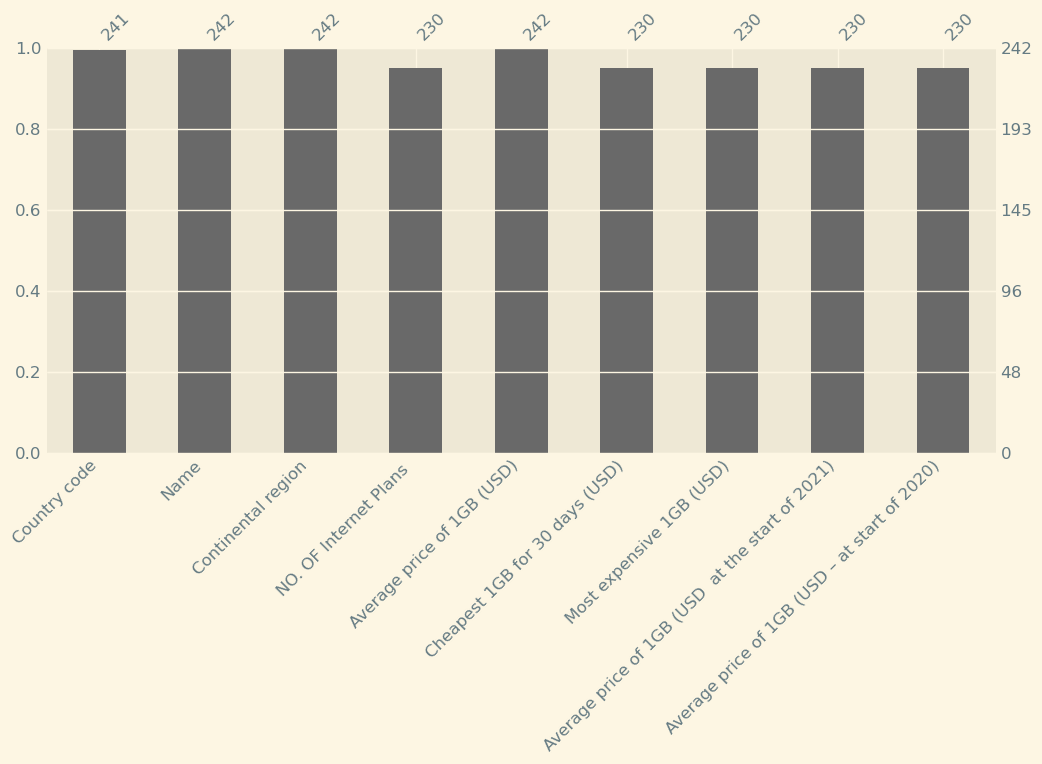

In [6]:
df.isnull().sum()
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
msno.bar(df, ax = axz, fontsize = 12)

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

Country code                                        0
Name                                                0
Continental region                                  0
NO. OF Internet Plans                               0
Average price of 1GB (USD)                          0
Cheapest 1GB for 30 days (USD)                      0
Most expensive 1GB (USD)                            0
Average price of 1GB (USD  at the start of 2021)    0
Average price of 1GB (USD – at start of 2020)       0
dtype: int64

In [8]:
df=df[df['Average price of 1GB (USD  at the start of 2021)'].str.startswith('$')]
df=df[df['Average price of 1GB (USD – at start of 2020)'].str.startswith('$')]

In [9]:
df['Average price of 1GB (USD)'] = df['Average price of 1GB (USD)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Cheapest 1GB for 30 days (USD)'] = df['Cheapest 1GB for 30 days (USD)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Most expensive 1GB (USD)'] = df['Most expensive 1GB (USD)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Average price of 1GB (USD  at the start of 2021)'] = df['Average price of 1GB (USD  at the start of 2021)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Average price of 1GB (USD – at start of 2020)'] = df['Average price of 1GB (USD – at start of 2020)'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [12]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)
df[categorical].head()


There are 3 categorical variables

The categorical variables are :

 ['Country code', 'Name', 'Continental region']


Country code        Name  Continental region
0           IL      Israel           NEAR EAST
1           KG  Kyrgyzstan   CIS (FORMER USSR)
2           FJ        Fiji             OCEANIA
3           IT       Italy      WESTERN EUROPE
4           SD       Sudan  SUB-SAHARAN AFRICA

In [13]:
df[categorical].isnull().sum()


Country code          0
Name                  0
Continental region    0
dtype: int64

In [14]:
for var in categorical: 
    
    print(df[var].value_counts())

IL    1
KG    1
CG    1
BZ    1
LU    1
     ..
IE    1
SE    1
GG    1
SA    1
GQ    1
Name: Country code, Length: 224, dtype: int64
Israel               1
Kyrgyzstan           1
Congo                1
Belize               1
Luxembourg           1
                    ..
Ireland              1
Sweden               1
Guernsey             1
Saudi Arabia         1
Equatorial Guinea    1
Name: Name, Length: 224, dtype: int64
SUB-SAHARAN AFRICA      46
WESTERN EUROPE          30
ASIA (EX. NEAR EAST)    28
CARIBBEAN               27
OCEANIA                 18
NEAR EAST               15
EASTERN EUROPE          14
SOUTH AMERICA           13
CIS (FORMER USSR)       11
CENTRAL AMERICA          8
NORTHERN AFRICA          7
NORTHERN AMERICA         4
BALTICS                  3
Name: Continental region, dtype: int64


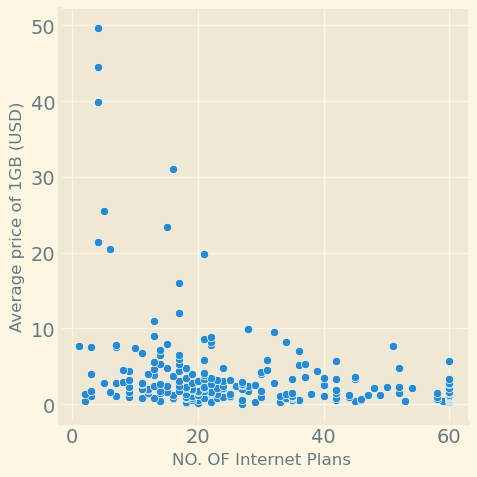

In [15]:
sns.relplot(x="NO. OF Internet Plans ", y="Average price of 1GB (USD)", data=df);

<Axes: xlabel='NO. OF Internet Plans ', ylabel='Count'>

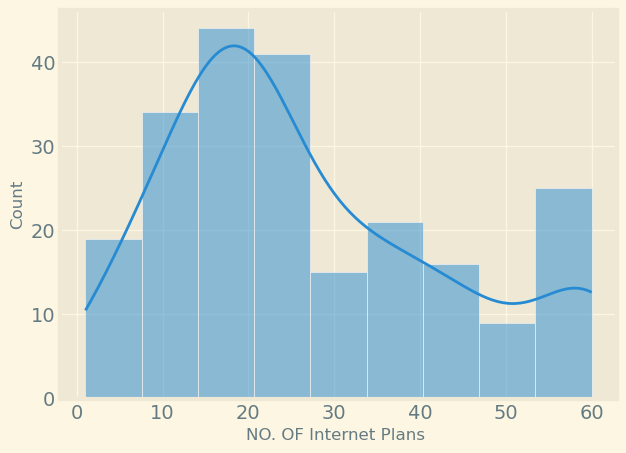

In [16]:
sns.histplot(data=df, x="NO. OF Internet Plans ", kde=True)

<Axes: xlabel='Cheapest 1GB for 30 days (USD)', ylabel='Count'>

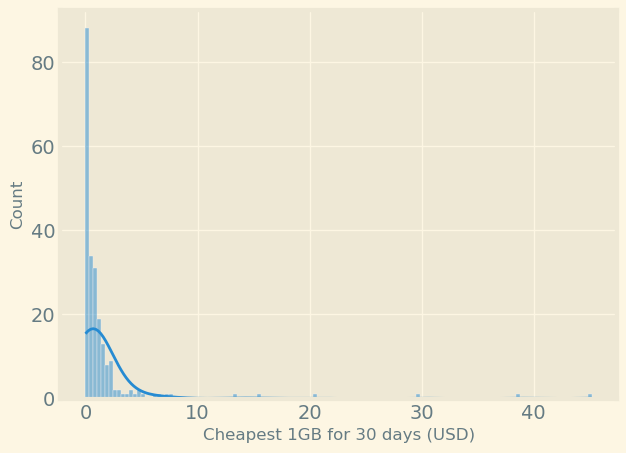

In [17]:
sns.histplot(data=df, x="Cheapest 1GB for 30 days (USD)", kde=True)

<Axes: xlabel='Average price of 1GB (USD  at the start of 2021)', ylabel='Count'>

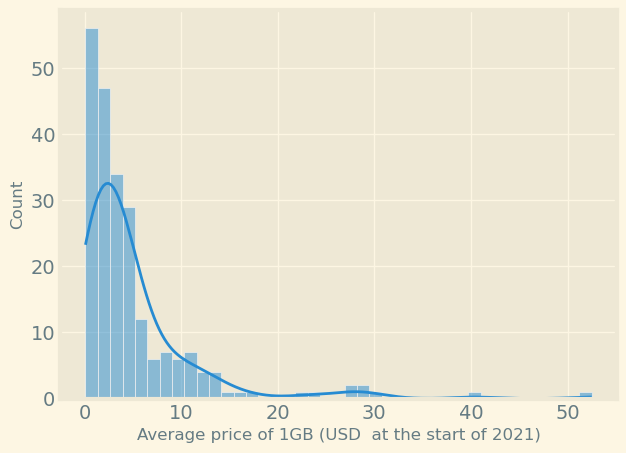

In [18]:
sns.histplot(data=df, x="Average price of 1GB (USD  at the start of 2021)", kde=True)

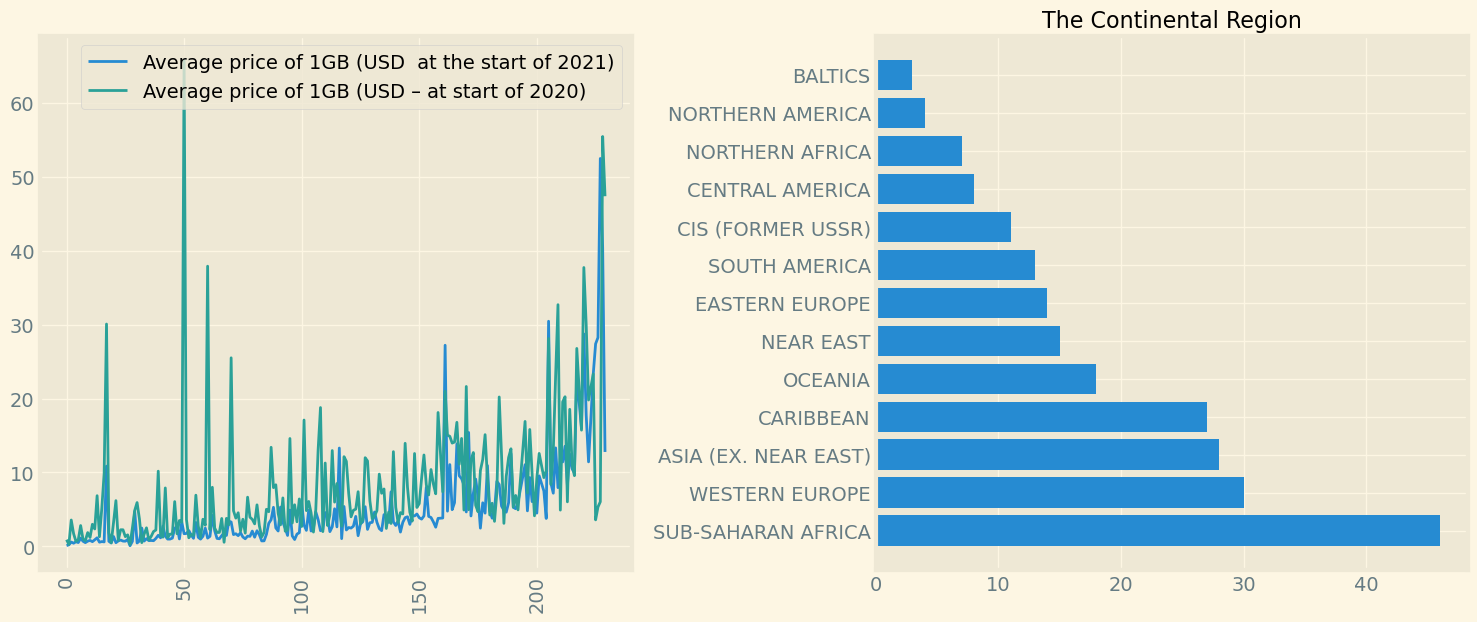

In [19]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)

g = sns.lineplot(data=df[['Average price of 1GB (USD  at the start of 2021)','Average price of 1GB (USD – at start of 2020)']],  dashes = False)

g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(df['Continental region'].value_counts().index, df['Continental region'].value_counts())
plt.title("The Continental Region")
plt.tight_layout()

Text(0.5, 1.0, 'Most expensive 1GB by Continental region')

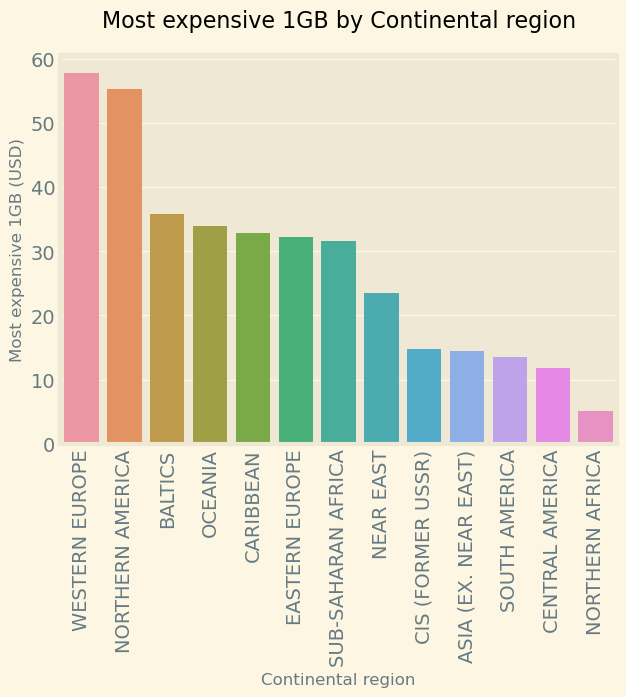

In [20]:
most_exp = df.groupby(['Continental region'])['Most expensive 1GB (USD)'].mean().reset_index().sort_values('Most expensive 1GB (USD)', ascending = False)
g = sns.barplot(x="Continental region", y="Most expensive 1GB (USD)", data=most_exp)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Most expensive 1GB by Continental region', pad=20)

Text(0.5, 1.0, 'Cheapest 1GB for 30 days (USD) by Continental region')

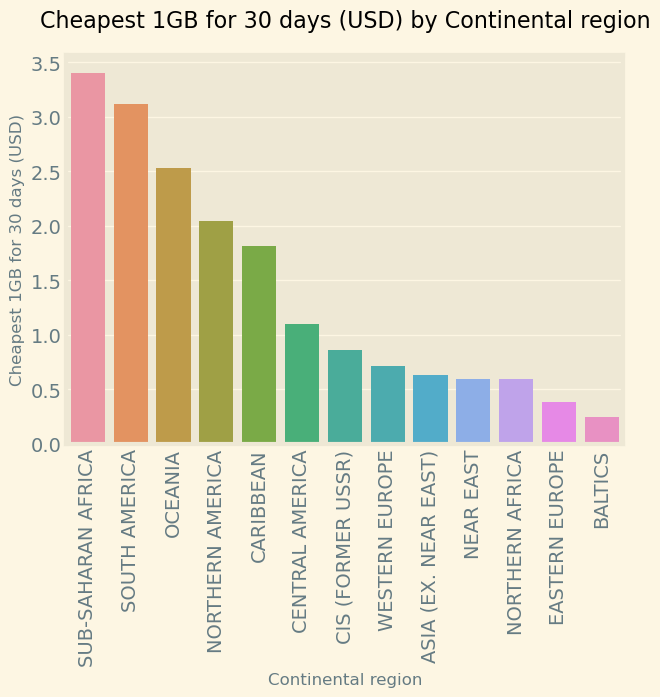

In [21]:
most_exp = df.groupby(['Continental region'])['Cheapest 1GB for 30 days (USD)'].mean().reset_index().sort_values('Cheapest 1GB for 30 days (USD)', ascending = False)
g = sns.barplot(x="Continental region", y="Cheapest 1GB for 30 days (USD)", data=most_exp)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Cheapest 1GB for 30 days (USD) by Continental region', pad=20)

Text(0.5, 1.0, 'Top 10 Country - Most expensive 1GB Country')

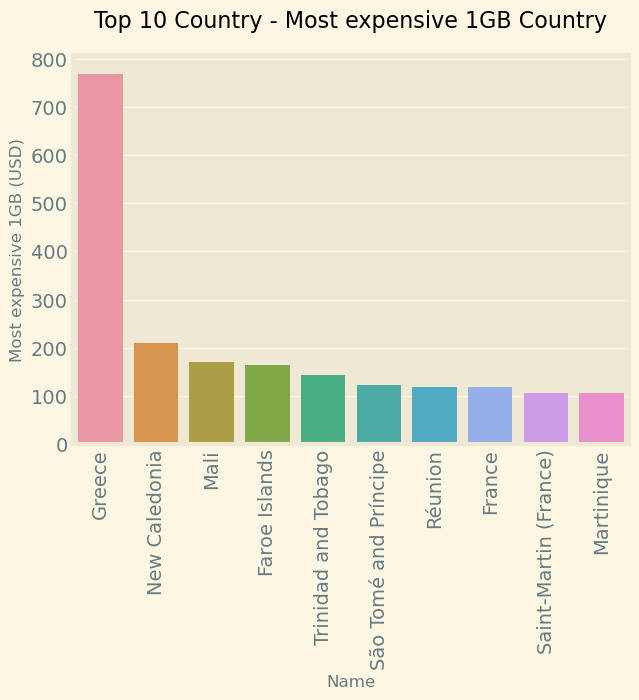

In [22]:
max_exp = df.groupby(['Name'])['Most expensive 1GB (USD)'].max().reset_index().sort_values('Most expensive 1GB (USD)', ascending = False)
g = sns.barplot(x="Name", y="Most expensive 1GB (USD)", data=max_exp[:10])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Top 10 Country - Most expensive 1GB Country', pad=20)

In [23]:
import plotly.express as px
fig = px.choropleth(df, locations='Name', locationmode='country names',scope='world',color='Most expensive 1GB (USD)',color_continuous_scale=px.colors.diverging.Earth)
fig

In [24]:
fig = px.choropleth(df, locations='Name', locationmode='country names',scope='world',color='Cheapest 1GB for 30 days (USD)',color_continuous_scale=px.colors.diverging.Earth)
fig